In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
filename = "ajaa7b7ct1_ascii.csv"

data = np.genfromtxt(filename, delimiter = ",", skip_header = 5, 
                     names = ["ID", "T_eff", "Teff_upper_unc", "Teff_lower_unc", 
                               "logg", "logg_upper_unc", "logg_lower_unc", 
                               "metal", "metal_upper_unc", "metal_lower_unc", 
                               "R_sstar", "R_sstar_upper_unc", "R_sstar_lower_unc", 
                               "M_sstar", "M_sstar_upper_unc", "M_sstar_lower_unc", 
                               "R_p", "R_p_upper_unc", "R_p_lower_unc", "P_orb"], dtype=None)
print(data["metal"])
print(data["metal_upper_unc"])

[-0.11  0.1   0.11  0.31 -0.04  0.1   0.11 -0.04  0.03 -0.1  -0.08 -0.11
  0.39 -0.07  0.17 -0.11  0.25  0.38  0.02  0.18  0.32  0.11  0.12  0.16
 -0.06  0.1  -0.59 -0.31 -0.07  0.25  0.2  -0.04  0.23  0.21  0.1  -0.01
  0.   -0.08 -0.09 -0.01 -0.    0.17  0.36 -0.    0.13  0.14  0.18  0.2
 -0.01  0.07  0.11  0.25 -0.11  0.12 -0.12 -0.11  0.1   0.06  0.07  0.08
 -0.01  0.   -0.09  0.12]
[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]


C:\Users\Ciera\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  if __name__ == '__main__':


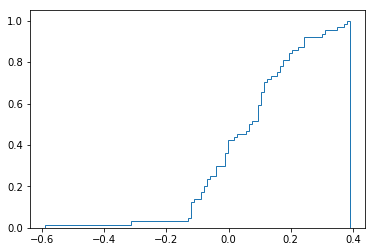

In [3]:
#Plotting metallicity as a histogram.
hist_metal_graph = plt.hist(data["metal"], bins = 100, cumulative = True, density = True, histtype = "step")

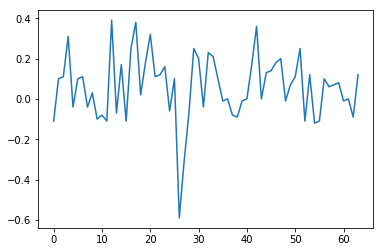

In [4]:
#Plotting metallicity as a regular plot. 
plot_metal_graph = plt.plot(data["metal"])

In [5]:
# Getting the metallicity + upper uncertainty. 
metal_upper = []
for met in data["metal"]:
    for unc in data["metal_upper_unc"]:
        result = met+unc
    metal_upper.append(result)
print(metal_upper)

# Getting the metallicity - lower uncertainty.
metal_lower = []
for met in data["metal"]:
    for unc in data["metal_lower_unc"]:
        result = met-unc
    metal_lower.append(result)
print(metal_lower)

[-0.07, 0.14, 0.15, 0.35, 0.0, 0.14, 0.15, 0.0, 0.07, -0.060000000000000005, -0.04, -0.07, 0.43, -0.030000000000000006, 0.21000000000000002, -0.07, 0.29, 0.42, 0.06, 0.22, 0.36, 0.15, 0.16, 0.2, -0.019999999999999997, 0.14, -0.5499999999999999, -0.27, -0.030000000000000006, 0.29, 0.24000000000000002, 0.0, 0.27, 0.25, 0.14, 0.03, 0.04, -0.04, -0.049999999999999996, 0.03, 0.04, 0.21000000000000002, 0.39999999999999997, 0.04, 0.17, 0.18000000000000002, 0.22, 0.24000000000000002, 0.03, 0.11000000000000001, 0.15, 0.29, -0.07, 0.16, -0.07999999999999999, -0.07, 0.14, 0.1, 0.11000000000000001, 0.12, 0.03, 0.04, -0.049999999999999996, 0.16]
[-0.15, 0.060000000000000005, 0.07, 0.27, -0.08, 0.060000000000000005, 0.07, -0.08, -0.010000000000000002, -0.14, -0.12, -0.15, 0.35000000000000003, -0.11000000000000001, 0.13, -0.15, 0.21, 0.34, -0.02, 0.13999999999999999, 0.28, 0.07, 0.07999999999999999, 0.12, -0.1, 0.060000000000000005, -0.63, -0.35, -0.11000000000000001, 0.21, 0.16, -0.08, 0.19, 0.16999

Ks_2sampResult(statistic=0.296875, pvalue=0.005358902120791728)


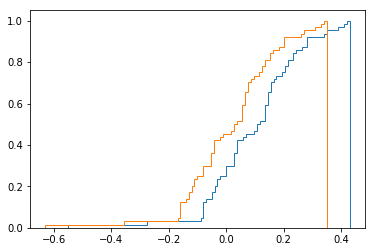

In [6]:
#Graphing the same data as histograms, showing blue as the upper uncertainty, and orange as the lower.
metal_up_graph = plt.hist(metal_upper, bins = 100, cumulative = True, density = True, histtype = "step")
metal_low_graph = plt.hist(metal_lower, bins = 100, cumulative = True, density = True, histtype = "step")

#KS-Test on upper and lower metallicity uncertainties. For no reason other than to say you can. 
ks = stats.ks_2samp(metal_upper, metal_lower)
print(ks)

Ks_2sampResult(statistic=0.21875, pvalue=0.3827773462930542)


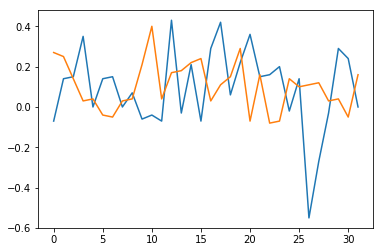

In [7]:
#Getting the first and second half of the metallicity + upper data set.
first_half_upper = metal_upper[:int(len(metal_upper)/2)]
second_half_upper = metal_upper[int(len(metal_upper)/2):]

#Plotting that. Blue is first half. Orange is second half.
fhu_graph = plt.plot(first_half_upper)
shu_graph = plt.plot(second_half_upper)

#KS-Test for the first and second halves. 
ks_halves = stats.ks_2samp(first_half_upper, second_half_upper)
print(ks_halves)